In [40]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time
plt.style.use('ggplot')

In [26]:
#convert an array of values into a dateset matrix (suprvised learning)
def create_dataset(dataset, look_back=1):
    dataX, dataY =[],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
dataframe = pd.read_csv('gs.us.txt', sep=',', header=0,index_col = 'Date',parse_dates=['Date']).fillna(0)
dataframe.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1999-05-05,62.213,62.213,58.991,61.547,8295140,0
1999-05-06,60.542,61.773,59.712,60.488,3185852,0
1999-05-07,60.488,66.671,59.429,65.998,5331091,0
1999-05-10,65.331,65.441,62.549,62.941,2839054,0


In [28]:
dataframe=dataframe['Close']

In [29]:
dataset=dataframe.values

In [30]:
dataframe.shape

(4661,)

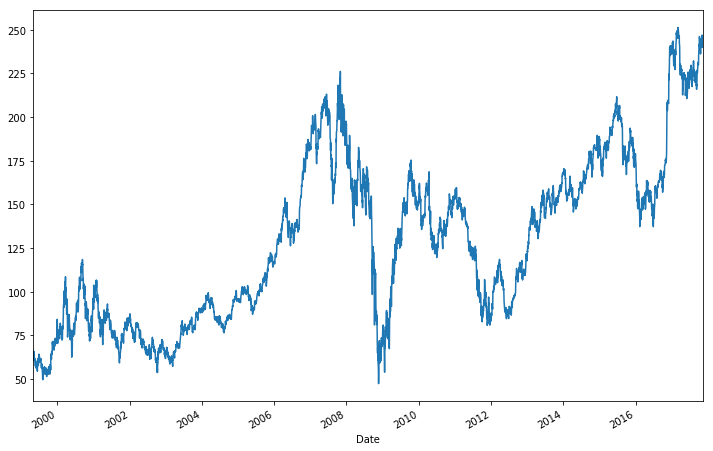

In [31]:
plt.figure(figsize=(12,8))
dataframe.plot()

In [32]:
dataset= dataset.reshape(-1,1)

In [33]:
#Normalize the dataset
scalar = MinMaxScaler(feature_range=(0, 1))
dataset = scalar.fit_transform(dataset)

In [34]:
display(dataset)

array([[0.0747481 ],
       [0.06929046],
       [0.06409294],
       ...,
       [0.95126404],
       [0.94900639],
       [0.9458653 ]])

In [35]:
#split data into train and test
train_size= int(len(dataset)*0.7)
test_size= len(dataset)-train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [36]:
#reshape into X=t Y=t+1  (create supervised learning)
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [37]:
#fix random seed for reproducibility
numpy.random.seed(7)

In [38]:
#reshape into be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0],1, testX.shape[1]))
trainY = numpy.reshape(trainY, (trainY.shape[0],1, trainY.shape[1]))
testY = numpy.reshape(testY, (testY.shape[0],1, testY.shape[1]))

In [41]:
#create and fit the LSTM network
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start=time.time()
model.compile(loss='MSE', optimizer='Adam')
print('Compilation time:',time.time()-start)


history=model.fit(trainX,trainY,batch_size=1,nb_epoch=50,validation_split=0.1, verbose=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # Remove the CWD from sys.path while we load stuff.
W0726 10:52:04.608187 4471195072 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epoch

Compilation time: 0.02319788932800293


W0726 10:52:05.058809 4471195072 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 10:52:06.099179 4471195072 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 2934 samples, validate on 326 samples
Epoch 1/50
 - 11s - loss: 0.0036 - val_loss: 3.7370e-04
Epoch 2/50
 - 9s - loss: 9.1888e-04 - val_loss: 2.2444e-04
Epoch 3/50
 - 10s - loss: 7.6552e-04 - val_loss: 1.5441e-04
Epoch 4/50
 - 9s - loss: 7.8759e-04 - val_loss: 4.1626e-04
Epoch 5/50
 - 9s - loss: 7.4694e-04 - val_loss: 2.0229e-04
Epoch 6/50
 - 9s - loss: 6.9973e-04 - val_loss: 3.1238e-04
Epoch 7/50
 - 9s - loss: 7.3787e-04 - val_loss: 1.7956e-04
Epoch 8/50
 - 9s - loss: 7.2586e-04 - val_loss: 1.8680e-04
Epoch 9/50
 - 11s - loss: 6.8221e-04 - val_loss: 1.8660e-04
Epoch 10/50
 - 16s - loss: 7.1191e-04 - val_loss: 3.9201e-04
Epoch 11/50
 - 14s - loss: 6.9238e-04 - val_loss: 1.5545e-04
Epoch 12/50
 - 13s - loss: 6.8779e-04 - val_loss: 1.6426e-04
Epoch 13/50
 - 12s - loss: 6.9990e-04 - val_loss: 1.6108e-04
Epoch 14/50
 - 11s - loss: 6.7665e-04 - val_loss: 3.4624e-04
Epoch 15/50
 - 11s - loss: 6.5974e-04 - val_loss: 2.1123e-04
Epoch 16/50
 - 11s - loss: 7.1452e-04 - val_loss: 1.8053e

In [42]:
#prediction
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [43]:
trainPredict=trainPredict.reshape(-1,1)
testPredict=testPredict.reshape(-1,1)
trainY=trainY.reshape(-1,1)
testY=testY.reshape(-1,1)

In [44]:
# invert predictions
trainPredict = scalar.inverse_transform(trainPredict)
trainY = scalar.inverse_transform(trainY)
testPredict = scalar.inverse_transform(testPredict)
testY = scalar.inverse_transform(testY)

In [45]:
#Calculate RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[0]))
print('trainScore: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[0]))
print('testScore: %.2f RMSE' %(testScore))

trainScore: 0.50 RMSE
testScore: 1.31 RMSE


In [46]:
#FOR TRAIN PLOTTING
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:]=numpy.nan
trainPredictPlot=numpy.reshape(trainPredictPlot,(dataset.shape[0],1))
trainPredictPlot[look_back:len(trainPredict)+look_back, :] =trainPredict

In [47]:
#FOR TEST PLOTTING
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:]=numpy.nan
testPredictPlot=numpy.reshape(testPredictPlot,(dataset.shape[0],1))
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] =testPredict

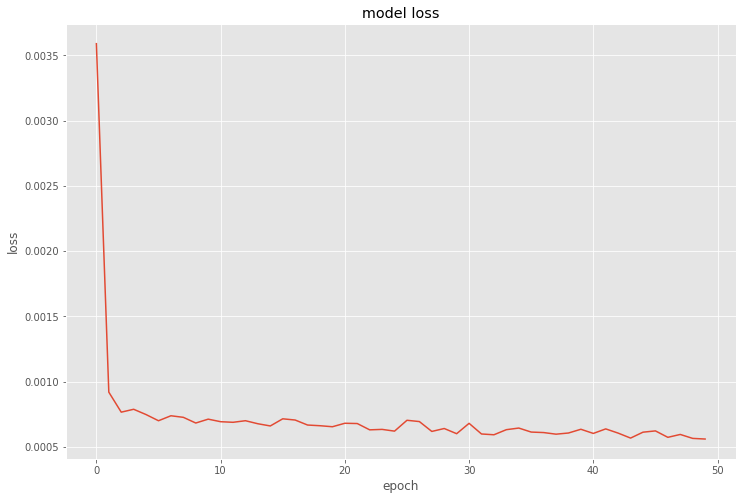

In [48]:
#summerize histroy for loss
fig=plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

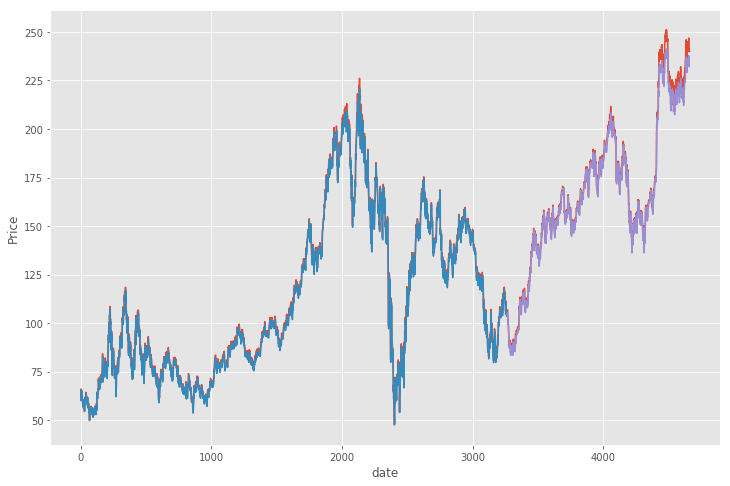

In [49]:
#plot prediction
fig = plt.figure(figsize=(12,8))
plt.plot(scalar.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('Price')
plt.xlabel('date')
plt.show()

In [51]:
yhat = history.forecast(history.y, steps=1)

AttributeError: 'History' object has no attribute 'forecast'